In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = pd.read_csv('depth.csv')
data

,pkid,backend,strategy,depth,culled_depth,transpile_time
0,0,AerSimulator,"[1, 0, 0]",16658,4505,"(0.263156377710402, 9.12422273028642)"
1,0,AerSimulator,"[1, 1, 0]",974,377,"(0.006570037454366684, 0.2655854718759656)"
2,0,AerSimulator,"[1, 0, 1]",798,215,"(0.15987842250615358, 0.6801555762067437)"
3,0,AerSimulator,"[1, 1, 1]",547,176,"(0.009842678904533386, 0.26921993773430586)"
4,1,AerSimulator,"[1, 0, 0]",26563,7155,"(0.22368592582643032, 15.904715334996581)"
5,1,AerSimulator,"[1, 1, 0]",1022,396,"(0.006490199826657772, 0.38273085560649633)"
6,1,AerSimulator,"[1, 0, 1]",14017,3796,"(0.1927209896966815, 7.701638588681817)"
7,1,AerSimulator,"[1, 1, 1]",750,271,"(0.008416092954576015, 0.2427291553467512)"
8,2,AerSimulator,"[1, 0, 0]",3030,832,"(0.21742813847959042, 1.712990252301097)"
9,2,AerSimulator,"[1, 1, 0]",1204,386,"(0.008250728249549866, 0.3345750756561756)"


In [39]:
# data.strategy = data.strategy.apply(lambda x: '1' if x else 'qiskit')

In [40]:
data

,pkid,backend,strategy,depth,culled_depth,transpile_time
0,0,AerSimulator,"[1, 0, 0]",16658,4505,"(0.263156377710402, 9.12422273028642)"
1,0,AerSimulator,"[1, 1, 0]",974,377,"(0.006570037454366684, 0.2655854718759656)"
2,0,AerSimulator,"[1, 0, 1]",798,215,"(0.15987842250615358, 0.6801555762067437)"
3,0,AerSimulator,"[1, 1, 1]",547,176,"(0.009842678904533386, 0.26921993773430586)"
4,1,AerSimulator,"[1, 0, 0]",26563,7155,"(0.22368592582643032, 15.904715334996581)"
5,1,AerSimulator,"[1, 1, 0]",1022,396,"(0.006490199826657772, 0.38273085560649633)"
6,1,AerSimulator,"[1, 0, 1]",14017,3796,"(0.1927209896966815, 7.701638588681817)"
7,1,AerSimulator,"[1, 1, 1]",750,271,"(0.008416092954576015, 0.2427291553467512)"
8,2,AerSimulator,"[1, 0, 0]",3030,832,"(0.21742813847959042, 1.712990252301097)"
9,2,AerSimulator,"[1, 1, 0]",1204,386,"(0.008250728249549866, 0.3345750756561756)"


In [41]:
data['transpile_time'] = data['transpile_time'].apply(lambda x: eval(x)[0]  + eval(x)[1] if x!= 'timeout' else 'timeout')
# data['unitarydecomposition'] = data['transpile_time'].apply(lambda x: eval(x)[1] if x!= 'timeout' else 'timeout')

In [42]:
data.drop(columns=['backend'], inplace=True)
data

,pkid,strategy,depth,culled_depth,transpile_time
0,0,"[1, 0, 0]",16658,4505,9.387379
1,0,"[1, 1, 0]",974,377,0.272156
2,0,"[1, 0, 1]",798,215,0.840034
3,0,"[1, 1, 1]",547,176,0.279063
4,1,"[1, 0, 0]",26563,7155,16.128401
5,1,"[1, 1, 0]",1022,396,0.389221
6,1,"[1, 0, 1]",14017,3796,7.894360
7,1,"[1, 1, 1]",750,271,0.251145
8,2,"[1, 0, 0]",3030,832,1.930418
9,2,"[1, 1, 0]",1204,386,0.342826


In [43]:
data = data.groupby(['strategy']).mean().reset_index()
data

,strategy,pkid,depth,culled_depth,transpile_time
0,"[1, 0, 0]",1.0,15417.000000,4164.000000,9.148733
1,"[1, 0, 1]",1.0,6039.000000,1634.333333,3.440414
2,"[1, 1, 0]",1.0,1066.666667,386.333333,0.334734
3,"[1, 1, 1]",1.0,786.666667,258.000000,0.265360


In [44]:
dataused = data.pivot(index ='pkid', columns='strategy', values=["culled_depth",'transpile_time'])
dataused

culled_depth                                    transpile_time  \
strategy    [1, 0, 0]    [1, 0, 1]   [1, 1, 0] [1, 1, 1]      [1, 0, 0]   
pkid                                                                      
1.0            4164.0  1634.333333  386.333333     258.0       9.148733   

                                        
strategy [1, 0, 1] [1, 1, 0] [1, 1, 1]  
pkid                                    
1.0       3.440414  0.334734   0.26536

/tmp/ipykernel_709622/1898267426.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(range(0, 3), minor=False)


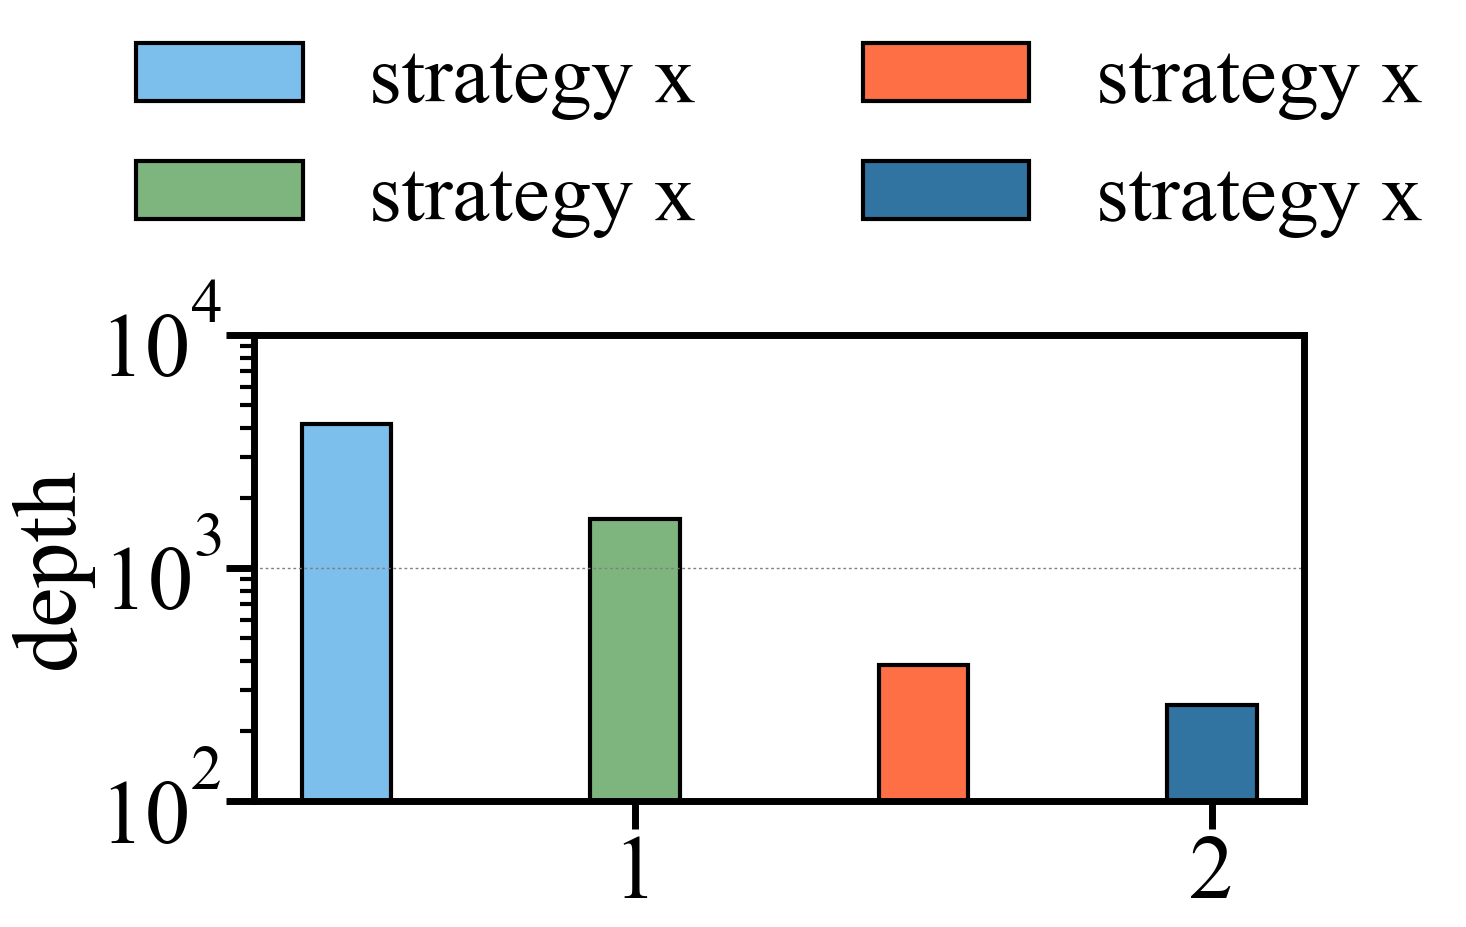

In [68]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
scale = 1.05
fig= plt.figure(figsize=(25*scale, 12*scale))
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 65,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    "markers.fillstyle" :  'left' , ## default
    "lines.markersize" : 30,
    "lines.markeredgewidth" : 3,
    # 'lines.markeredgecolor': 'black',
})
bar_width = 0.31
shrink = 0

colors = ["#7CBEEC", "#7EB57E", "#FF6F45", "#3274A1"]
labels = ['depth', 'rss usage (MB)']
# for i, metric in enumerate( ["culled_depth",'rss_usage']):
i = 0
axes = plt.axes([0, 0, 0.40, 0.37])
ylabel = 'depth'

indexs = [i for i in np.arange(0, len(dataused.index.values))]
for i in range(0, len(indexs) - 1, 3):
    indexs[i] += shrink
    indexs[i + 2] -= shrink

ymetric = "culled_depth" # best_solution_probs
axes.bar(1, dataused[ymetric]['[1, 0, 0]'].apply(lambda x: float(x) if x != 'timeout' else np.nan), linewidth=3, edgecolor='black', width=bar_width, label="strategy x",
        color=colors[0])
axes.bar(2, dataused[ymetric]['[1, 0, 1]'].apply(lambda x: float(x) if x != 'timeout' else np.nan), linewidth=3, edgecolor='black', width=bar_width, label="strategy x",
        color=colors[1])
axes.bar(3, dataused[ymetric]['[1, 1, 0]'].apply(lambda x: float(x) if x != 'timeout' else np.nan), linewidth=3, edgecolor='black', width=bar_width, label="strategy x",
        color=colors[2])
axes.bar(4, dataused[ymetric]['[1, 1, 1]'].apply(lambda x: float(x) if x != 'timeout' else np.nan), linewidth=3, edgecolor='black', width=bar_width, label="strategy x",
        color=colors[3])

axes.set_ylabel(r"depth")
# axes.set_yticks([1200], minor=False)
# axes.set_yscale("log")
# index = indexs
# axes.set_xticks(index, minor=False)
axes.set_yticks(range(0, 10000, 2500), minor=False)
# axes.set_yticks(range(0, 8000, 500), minor=True)
axes.set_xticklabels(range(0, 3), minor=False)
# axes.set_xticklabels(["F2", "G2", "K2"])
# axes.set_xlim(0 - 4 * bar_width + shrink, 2 + 4 * bar_width - shrink)
axes.set_yscale('log')
axes.set_ylim(100, 10000)
axes.grid(axis="y", color="gray", linestyle="--", linewidth=1, dashes=(2, 2))
axes.legend(frameon=False, bbox_to_anchor=(0.5, 1.05), loc='lower center', ncol=2, prop={'size': 60})
plt.savefig("ablation_depth.svg", bbox_inches="tight")